# Procesamiento del Lenguaje Natural

## Práctica 1

Preprocesar un corpus a partir de métodos basados en lenguajes formales.

Carlos Pérez Vásquez

In [17]:
import nltk
import re
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import string

In [18]:
#Lista para almacenar el corpus.
kavi=[]

## Se escogió una obra de Friedrich Nietzsche como corpus.
![Texto alternativo](docs/zar.jpg)

In [19]:
# Leer  archivo y guardar el texto en la lista "kavi"

with open('docs/zaratustra.txt', 'rt') as file:
    kavi = file.read().lower()

### dividir cadenas en tokens. con la  función llamada word_tokenize()  de NLTK
### Divide los tokens según el espacio en blanco y la puntuación

In [20]:
tokens = nltk.word_tokenize(kavi)

### Filtrar puntuación

In [21]:
kein_punkt = re.compile('[%s]' % re.escape(string.punctuation))
ohne= [kein_punkt.sub('', w) for w in tokens]
tuun = [word for word in ohne if word.isalpha()]

### Eliminar las stopwords usando lista pre-hecha de NLTK

In [22]:

stop_words = set(nltk.corpus.stopwords.words('spanish'))
tuuncl = [w for w in tuun if not w in stop_words]

### Algoritmo de Stemming a los tokens limpios (tuuncl) con el algoritmo de Porter 

In [23]:
porter = nltk.stem.PorterStemmer()
stemmed = [porter.stem(word) for word in tuuncl]

In [24]:
# se guarda los tokens limpios  en un archivo
with open('tutukavi.txt', 'w') as file:
    for token in stemmed:
        file.write(token)
        file.write('\n')

### Número de tokens

In [25]:
num_tokens=len(stemmed)
num_tokens

43172

### Crear lista de tipos y sus frecuencias, ordenandolos de mayor a menor frecuencia

In [26]:
tipos =  list(set(stemmed))
# asignar  frecuencias a cada token
freq_tipos = Counter(stemmed)
# ordenar las frecuencias de maor a menor
freq_tipo= sorted(freq_tipos.items(), key=lambda x: x[1], reverse=True)


### Con esta función (nltk.FreqDist()) también se pueden obtener una distribución de frecuencias con NLTK

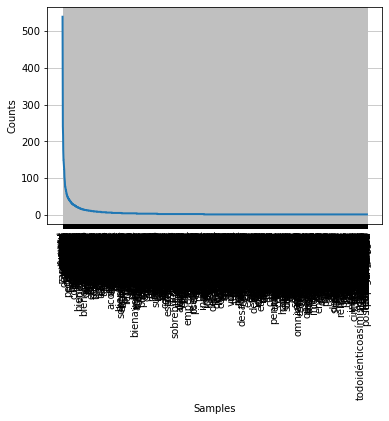

In [28]:

freq=nltk.FreqDist(stemmed) 
freq.plot()

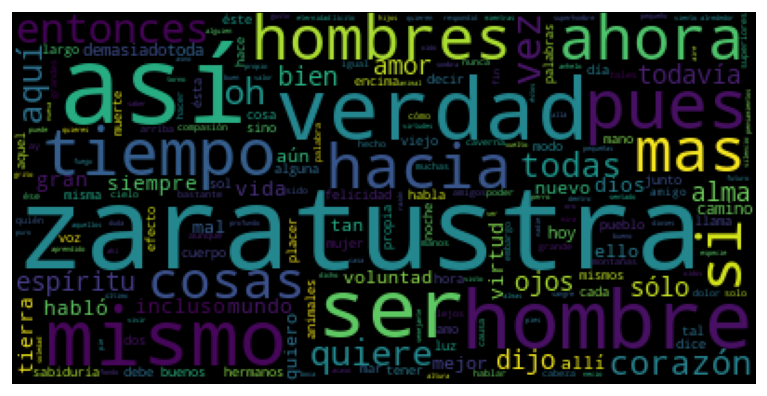

In [29]:
mycloud = WordCloud()

mycloud.generate_from_frequencies(Counter(tuuncl))

plt.figure(figsize=(8,6), dpi=120)
plt.imshow(mycloud)
plt.axis("off")
plt.show()